# **DEEP LEARNING COURSE PROJECT (IMAGE CLASSIFICATION)**

### **NAME:** ANISH SRIRAM B S
### **SCHOOL:** SCDS
### **EMAIL:** anishsriram.b-26@scds.saiuniversity.edu.in

## FINE TUNING - RESNET101V2 MODEL

### LOADING THE DATASET

### Details:

*   Total Number of Images in the Dataset: 1661
*   Number of Images present per class:
    *   Number of Images in Motorbikes: 500
    *   Number of Images in Airplanes: 500
    *   Number of Images in Schooner: 63
*   Total Number of Images used for Training and Testing: 1063
    *   Number of Images used for Training: 797
    *   Number of Images used for Testing: 266


In [1]:
# Importing necessary modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,f1_score
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Loading the dataset which is already processed
X_train_std = load('/content/drive/MyDrive/Deep Learning Project/Dataset/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Deep Learning Project/Dataset/X_test_std.npy')
y_train = load('/content/drive/MyDrive/Deep Learning Project/Dataset/y_train.npy')
y_test = load('/content/drive/MyDrive/Deep Learning Project/Dataset/y_test.npy')

print("X_train_std_shape:",X_train_std.shape)
print("X_test_std_shape:",X_test_std.shape)
print("y_train_shape:",y_train.shape)
print("y_test_shape:",y_test.shape)

X_train_std_shape: (797, 299, 299, 3)
X_test_std_shape: (266, 299, 299, 3)
y_train_shape: (797,)
y_test_shape: (266,)


### LOADING THE TRANSFER LEARNING MODEL

In [4]:
# Loading the saved best TL model
model_2_FT = keras.models.load_model('/content/drive/MyDrive/Deep Learning Project/Model2/Best_model_2_TL.keras')
model_2_FT.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, None, None, 64) │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, None, None, 64) │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, None, None, 64) │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 42,661,387 (162.74 MB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 42,630,656 (162.62 MB)

 Optimizer params: 20,488 (80.04 KB)

### FINE TUNING

In [5]:
tot_layers = len(model_2_FT.layers) # Total layers in the model
nontrain_layers = int(tot_layers*0.35) # Computing 35% of the total layers in the model

# Setting the initial 35% of the layers of the model as non trainable and remaining layers as trainable
for layer in model_2_FT.layers[:nontrain_layers]:
  layer.trainable=False
for layer in model_2_FT.layers[nontrain_layers:]:
  layer.trainable=True

In [6]:
# Compiling the model
model_2_FT.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Saving the best model using Callbacks
callbacks_2_FT = [keras.callbacks.ModelCheckpoint("Best_Model_2_FT.weights.h5",monitor="val_accuracy",save_weights_only=True,save_best_only=True)]

# Training the model
train_model_2_FT = model_2_FT.fit(x=X_train_std,y=y_train,epochs=10,validation_split=0.1,batch_size=16,callbacks=callbacks_2_FT)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8418 - loss: 0.6685 - val_accuracy: 0.4750 - val_loss: 106926.7109
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 506ms/step - accuracy: 0.9060 - loss: 0.2926 - val_accuracy: 0.6125 - val_loss: 4958.6050
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step - accuracy: 0.9158 - loss: 0.3454 - val_accuracy: 0.5000 - val_loss: 3083.3782
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 589ms/step - accuracy: 0.9316 - loss: 0.1856 - val_accuracy: 0.6500 - val_loss: 1039.8619
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.9709 - loss: 0.1035 - val_accuracy: 0.4750 - val_loss: 103.4368
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 29s 520ms/step - accuracy: 0.9794 - loss: 0.0519 - val_accuracy: 1.0000 - val_loss: 0.0375
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.9815 - loss: 0.0643 - val_accuracy: 0.4875 - val_loss: 381.5362
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9786 - loss: 0

### GENERATING CONFUSION MATRIX

9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


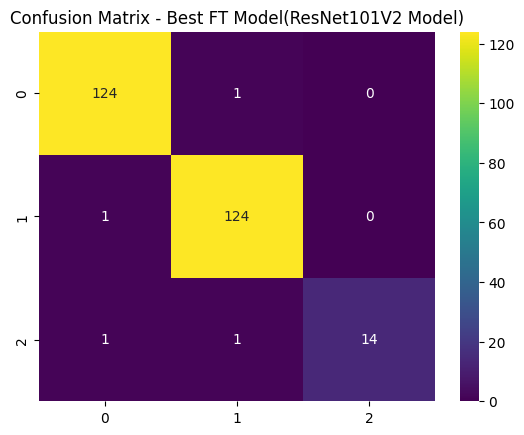

In [7]:
# Updating the model with best weights
model_2_FT.load_weights("Best_Model_2_FT.weights.h5")

# Getting the Prediction of the testing data
prob = model_2_FT.predict(X_test_std)
y_pred = np.argmax(prob,axis=1)

confmat_model2 = confusion_matrix(y_test, y_pred) # Generating the confusion matrix
sns.heatmap(confmat_model2, annot=True, fmt='d', cmap='viridis') # Plotting the confusion matrix
plt.title('Confusion Matrix - Best FT Model(ResNet101V2 Model)')
plt.show()



### GENERATING THE PRECISION, RECALL, F1 SCORE

In [8]:
precision_model2 = precision_score(y_test, y_pred,average='weighted') # Computing the precision score
recall_model2 = recall_score(y_test, y_pred,average='weighted') # Computing the recall score
f1_model2 = f1_score(y_test, y_pred,average='weighted') # Computing the F1 score

# Displaying the Classification Report
print("\nClassification Report - Best FT Model(ResNet101V2 Model)")
print(classification_report(y_test, y_pred,target_names=["Motorbikes","Airplanes","Schooners"]))
print("Precison Score:",precision_model2)
print("Recall Score:",recall_model2)
print("F1 Score:",f1_model2)



Classification Report - Best FT Model(ResNet101V2 Model)
              precision    recall  f1-score   support

  Motorbikes       0.98      0.99      0.99       125
   Airplanes       0.98      0.99      0.99       125
   Schooners       1.00      0.88      0.93        16

    accuracy                           0.98       266
   macro avg       0.99      0.95      0.97       266
weighted avg       0.99      0.98      0.98       266

Precison Score: 0.9850817519990452
Recall Score: 0.9849624060150376
F1 Score: 0.9847567124983773
